In [1]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])


In [2]:
pdData.insert(0,'ones',1)#增加全为1的x0列

数据预处理

Text(0,0.5,'exam2')

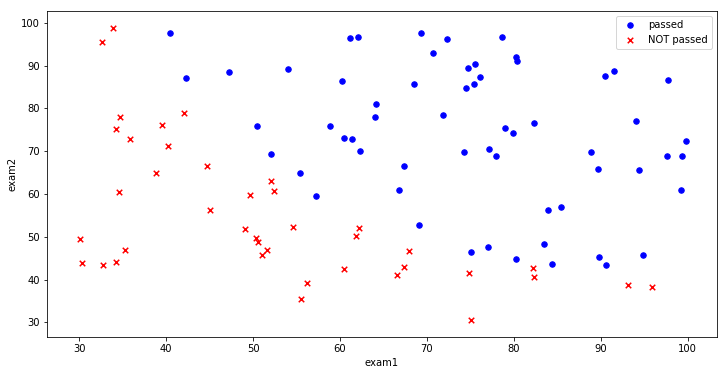

In [3]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=30,c='b',marker='o',label='passed')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='NOT passed')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')

In [4]:
orig_data = pdData.values
cols = orig_data.shape[1]
X=orig_data[:,:cols-1]
y =orig_data[:,cols-1:cols]
theta = np.zeros([1,cols-1])

定义model
$$  y={{\theta }^{T}}X\  $$ 

In [218]:
def model(X,theta):
    return np.dot(X,theta.T)

损失函数， 求她的极值（最小二乘）
$$  J(\theta )=\frac{1}{2}\sum\limits_{i=1}^{m}{{{({{y}^{(i)}}-{{\theta }^{T}}{{x}^{(i)}})}^{2}}} $$

In [219]:
cost(X,y,theta)

3000.0

求导(计算梯度) 矩阵求导得
$${{\nabla }_{\theta }}(J(\theta ))={{X}^{T}}X\theta -{{X}^{T}}y$$


In [222]:
def gradient(X,y,theta):
    grad = np.zeros(theta.shape)
    left = np.dot(np.dot(np.transpose(X),X),theta.T)
    right = np.dot(np.transpose(X),y)
    res = left-right
    grad = res.ravel()
    return grad

In [223]:
gradient(X,y,theta)

array([  -60.        , -4483.1353618 , -4437.38412496])

Gradient descent 梯度下降 的实现，先是无脑版,计算所有数据

In [237]:
import time

def descent(X,y,theta,alpha,n):
    init_time = time.time()
    grad = np.zeros(theta.shape)

    costs = [cost(X,y,theta)] # 损失值
    i=0
    while True:
        grad= gradient(X,y,theta)
        theta = theta - alpha*grad
        i += 1
        costs.append(cost(X,y,theta))
        if i>n: break
    return theta,i-1,costs,grad,time.time()-init_time

执行函数

In [238]:
def runExpe(X,y, theta, alpha,n):
    theta, iter, costs, grad, dur = descent(X,y, theta, alpha,n)
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    return theta

[[-0.04904955  0.00618757  0.00439499]]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

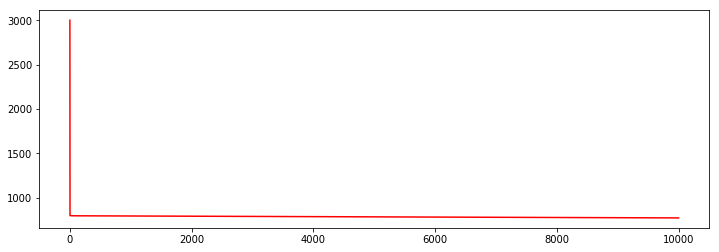

In [324]:
alpha = 0.000001
n=10000

theta1 = runExpe(X,y, theta, alpha,n)
print theta1


res =  np.dot(X,np.transpose(theta1))
passd = np.int64(res > 0.5)

res =  passd.ravel() - pdData['Admitted']
res.ravel()


